## Essential GIS Raster Operations

In [1]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np

## 1- Reading and Exploring raster data

### Openning a single-band DEM image using

In [2]:
raster_path = ('https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif')
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


### Retrieving and printing the raster metadata

#### Raster Metadata

In [3]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

#### Cordinate Reference System (SRC)

In [4]:
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

#### Spatial Resolution

##### the size of one pixel in real-world units

In [5]:
src.res

(90.0, 89.99579177642138)

#### Bounds

##### Represented by the coordinates of the edges of the raster (left, bottom, right, top).

In [6]:
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

#### Number of bands

In [7]:
src.count

1

#### Data Types

##### the data type of each pixel value 

In [8]:
src.dtypes

('int16',)

#### Raster Dimensions

##### Width:

In [9]:
src.width

4269

##### Heigth

In [10]:
src.height

3113

In [11]:
src.shape

(3113, 4269)

## 2.- Visualizing and Manipulating Raster Bands

### Visualizing the single-band DEM using a custom colormap.

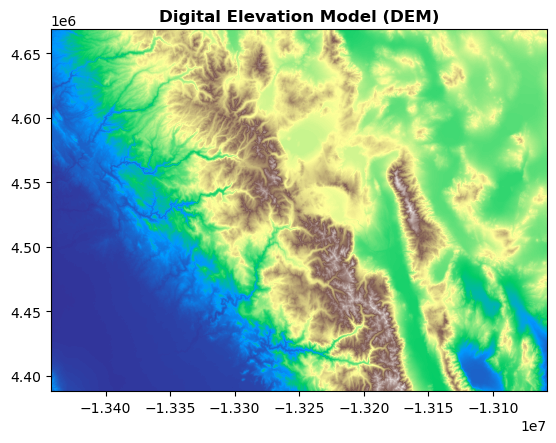

<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

In [12]:
rasterio.plot.show(src, cmap="terrain", title="Digital Elevation Model (DEM)")

### Opening a multispectral image and visualizing the first band 

In [13]:
multi_raster_path =  "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
multi_src = rasterio.open(multi_raster_path)

print(multi_src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


#### Number of bands

In [14]:
multi_src.count

7

#### Visualizing the first band

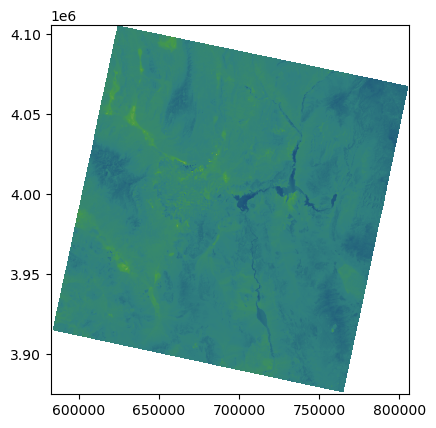

<Axes: >

In [15]:
rasterio.plot.show((multi_src,1), cmap="gist_earth")

### Combining multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

In [16]:
#getting the differents bands
blue_band = multi_src.read(2)
green_band = multi_src.read(3)
red_band = multi_src.read(4)

In [17]:
rgb_shape = (multi_src.height,multi_src.width,3)
rgb_shape

(2563, 2485, 3)

In [18]:
# creating the rgb image
rgb_image = np.zeros(rgb_shape)
rgb_image[:,:,0] = red_band
rgb_image[:,:,1] = green_band
rgb_image[:,:,2] = blue_band

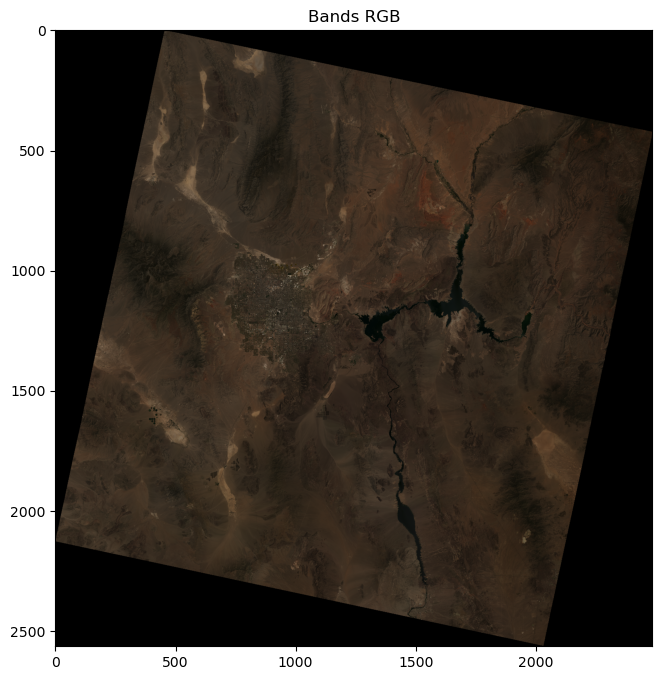

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(rgb_image.clip(0, 1))
plt.title("Bands RGB")
plt.show()